## 1. Import Required Libraries

# Car Price Prediction using CatBoost

This notebook demonstrates a professional approach to building a CatBoost regression model for predicting car prices in Sri Lanka.

## Table of Contents
1. Import Libraries
2. Load and Explore Data
3. Data Preprocessing
4. Feature Engineering
5. Stratified Data Splitting
6. Model Training
7. Model Evaluation
8. Feature Importance Analysis
9. Model Persistence

In [26]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model
from catboost import CatBoostRegressor, Pool

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Data

In [27]:
# Load the dataset
df = pd.read_csv('../data/car_price.csv')

# Remove the first column (ID column - unnamed index)
df = df.drop(df.columns[0], axis=1)

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Column Names:\n{list(df.columns)}")
print(f"\n🔍 First 5 rows:")
df.head()

DATASET OVERVIEW

📊 Dataset Shape: 9788 rows × 16 columns

📋 Column Names:
['Brand', 'Model', 'YOM', 'Engine (cc)', 'Gear', 'Fuel Type', 'Millage(KM)', 'Town', 'Date', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW', 'Price']

🔍 First 5 rows:


,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,100.0
1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,97.0
2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,98.5
3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,107.0
4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,99.5


In [28]:
# Data types and missing values
print("\n" + "=" * 60)
print("DATA TYPES AND MISSING VALUES")
print("=" * 60)
print(f"\n📝 Data Types:")
print(df.dtypes)
print(f"\n❌ Missing Values:")
print(df.isnull().sum())
print(f"\n📈 Statistical Summary:")
df.describe()


DATA TYPES AND MISSING VALUES

📝 Data Types:
Brand                 str
Model                 str
YOM                 int64
Engine (cc)       float64
Gear                  str
Fuel Type             str
Millage(KM)       float64
Town                  str
Date                  str
Leasing               str
Condition             str
AIR CONDITION         str
POWER STEERING        str
POWER MIRROR          str
POWER WINDOW          str
Price             float64
dtype: object

❌ Missing Values:
Brand             0
Model             0
YOM               0
Engine (cc)       0
Gear              0
Fuel Type         0
Millage(KM)       0
Town              0
Date              0
Leasing           0
Condition         0
AIR CONDITION     0
POWER STEERING    0
POWER MIRROR      0
POWER WINDOW      0
Price             0
dtype: int64

📈 Statistical Summary:


,YOM,Engine (cc),Millage(KM),Price
count,9788.000000,9788.000000,9788.000000,9788.000000
mean,2006.759093,1260.442358,200649.979567,53.464275
std,9.831574,403.769059,108147.314860,43.625049
min,1956.000000,573.000000,11000.000000,2.650000
25%,2001.000000,1000.000000,110000.000000,26.250000
50%,2009.000000,1300.000000,176000.000000,43.000000
75%,2015.000000,1500.000000,264000.000000,69.750000
max,2024.000000,4800.000000,759000.000000,790.000000


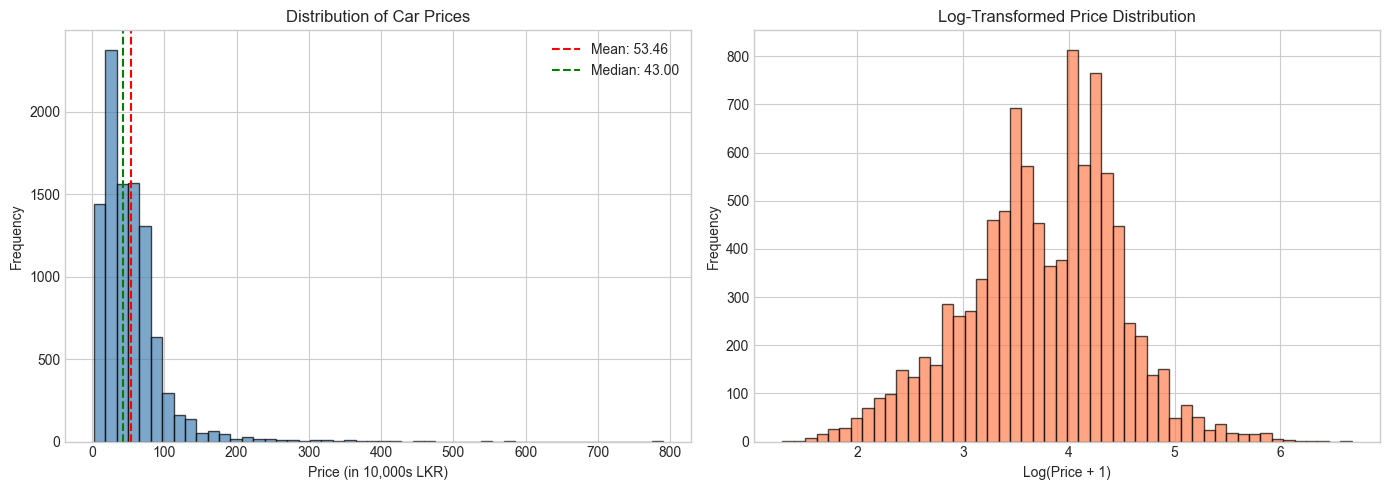


💰 Price Statistics (in 10,000s LKR):
   Min: 2.65 | Max: 790.00
   Mean: 53.46 | Median: 43.00
   Std: 43.63


In [29]:
# Visualize target variable distribution (Price is in 10000s)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Price (in 10,000s LKR)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Car Prices')
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: {df["Price"].mean():.2f}')
axes[0].axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: {df["Price"].median():.2f}')
axes[0].legend()

# Log-transformed price distribution
axes[1].hist(np.log1p(df['Price']), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()

print(f"\n💰 Price Statistics (in 10,000s LKR):")
print(f"   Min: {df['Price'].min():.2f} | Max: {df['Price'].max():.2f}")
print(f"   Mean: {df['Price'].mean():.2f} | Median: {df['Price'].median():.2f}")
print(f"   Std: {df['Price'].std():.2f}")

## 3. Data Preprocessing

In [30]:
# Create a copy for preprocessing
df_processed = df.copy()

# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Price')  # Remove target variable

print("=" * 60)
print("COLUMN CLASSIFICATION")
print("=" * 60)
print(f"\n📊 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}: {df_processed[col].nunique()} unique values")

print(f"\n📊 Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   • {col}: Range [{df_processed[col].min():.2f}, {df_processed[col].max():.2f}]")

COLUMN CLASSIFICATION

📊 Categorical Columns (12):
   • Brand: 50 unique values
   • Model: 1555 unique values
   • Gear: 2 unique values
   • Fuel Type: 4 unique values
   • Town: 107 unique values
   • Date: 65 unique values
   • Leasing: 2 unique values
   • Condition: 2 unique values
   • AIR CONDITION: 2 unique values
   • POWER STEERING: 2 unique values
   • POWER MIRROR: 2 unique values
   • POWER WINDOW: 2 unique values

📊 Numerical Columns (3):
   • YOM: Range [1956.00, 2024.00]
   • Engine (cc): Range [573.00, 4800.00]
   • Millage(KM): Range [11000.00, 759000.00]


In [31]:
# Handle missing values
print("=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Check for missing values
missing_before = df_processed.isnull().sum().sum()
print(f"\n❌ Total missing values before: {missing_before}")

# Fill numerical missing values with median
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"   • {col}: Filled with median = {median_val:.2f}")

# Fill categorical missing values with mode
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_val = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"   • {col}: Filled with mode = {mode_val}")

missing_after = df_processed.isnull().sum().sum()
print(f"\n✅ Total missing values after: {missing_after}")

HANDLING MISSING VALUES

❌ Total missing values before: 0

✅ Total missing values after: 0


## 4. Feature Engineering

In [32]:
# Feature Engineering
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Convert Date to datetime and extract features
df_processed['Date'] = pd.to_datetime(df_processed['Date'])
df_processed['Listing_Year'] = df_processed['Date'].dt.year
df_processed['Listing_Month'] = df_processed['Date'].dt.month
df_processed['Listing_Day'] = df_processed['Date'].dt.day

# Calculate car age (from Year of Manufacture to listing date)
df_processed['Car_Age'] = df_processed['Listing_Year'] - df_processed['YOM']

# Calculate average mileage per year
df_processed['Mileage_Per_Year'] = df_processed['Millage(KM)'] / (df_processed['Car_Age'] + 1)  # +1 to avoid division by zero

# Drop the original Date column as we've extracted features
df_processed = df_processed.drop('Date', axis=1)

# Create price bins for stratified splitting (based on price ranges)
df_processed['Price_Bin'] = pd.qcut(df_processed['Price'], q=5, labels=['Very_Low', 'Low', 'Medium', 'High', 'Very_High'])

print("\n✅ New Features Created:")
print("   • Listing_Year: Year when the car was listed")
print("   • Listing_Month: Month when the car was listed")
print("   • Listing_Day: Day when the car was listed")
print("   • Car_Age: Age of the car in years")
print("   • Mileage_Per_Year: Average kilometers driven per year")
print("   • Price_Bin: Price category for stratified splitting")

print(f"\n📊 Updated Dataset Shape: {df_processed.shape}")
df_processed.head()

FEATURE ENGINEERING

✅ New Features Created:
   • Listing_Year: Year when the car was listed
   • Listing_Month: Month when the car was listed
   • Listing_Day: Day when the car was listed
   • Car_Age: Age of the car in years
   • Mileage_Per_Year: Average kilometers driven per year
   • Price_Bin: Price category for stratified splitting

📊 Updated Dataset Shape: (9788, 21)


,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price,Listing_Year,Listing_Month,Listing_Day,Car_Age,Mileage_Per_Year,Price_Bin
0,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,No Leasing,USED,Available,Available,Available,Available,100.0,2025,2,5,9,9900.000000,Very_High
1,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,97.0,2025,1,14,8,9777.777778,Very_High
2,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,No Leasing,USED,Available,Available,Available,Available,98.5,2025,1,23,7,9625.000000,Very_High
3,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,No Leasing,USED,Available,Available,Available,Available,107.0,2024,12,21,7,11000.000000,Very_High
4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,No Leasing,USED,Available,Available,Available,Available,99.5,2024,12,21,7,11000.000000,Very_High


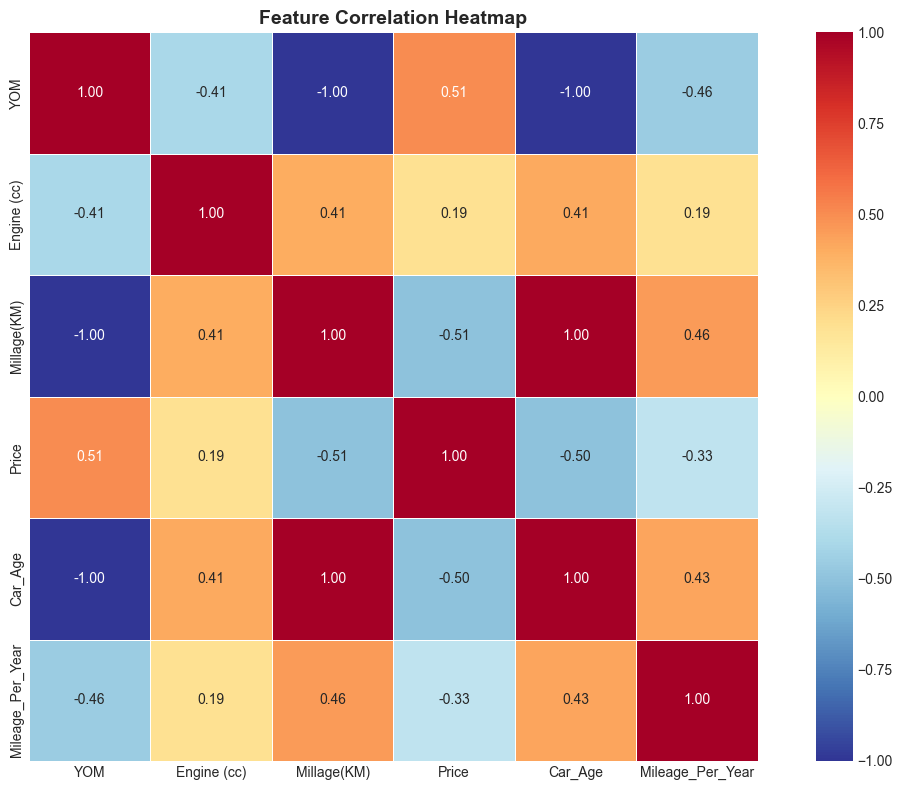


📊 Correlation with Price:
   YOM                 : +0.507 ██████████
   Engine (cc)         : +0.194 ███
   Mileage_Per_Year    : -0.327 ██████
   Car_Age             : -0.505 ██████████
   Millage(KM)         : -0.507 ██████████


In [33]:
# Visualize feature correlations
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation
num_cols_for_corr = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df_processed[num_cols_for_corr].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlation with Price
print("\n📊 Correlation with Price:")
price_corr = correlation_matrix['Price'].sort_values(ascending=False)
for feature, corr in price_corr.items():
    if feature != 'Price':
        bar = '█' * int(abs(corr) * 20)
        sign = '+' if corr > 0 else '-'
        print(f"   {feature:20s}: {sign}{abs(corr):.3f} {bar}")

## 5. Stratified Data Splitting

Using stratified splitting based on Brand and Price categories to ensure:
- Representative distribution of car brands in both train and test sets
- Similar price distributions in both sets
- Better generalization of the model

In [34]:
# Prepare features and target
print("=" * 60)
print("STRATIFIED DATA SPLITTING")
print("=" * 60)

# Create stratification key combining Brand and Price_Bin
# This ensures both brand diversity and price range diversity in train/test sets
df_processed['Stratify_Key'] = df_processed['Brand'].astype(str) + '_' + df_processed['Price_Bin'].astype(str)

# Handle rare combinations by grouping them
stratify_counts = df_processed['Stratify_Key'].value_counts()
rare_combinations = stratify_counts[stratify_counts < 2].index
df_processed.loc[df_processed['Stratify_Key'].isin(rare_combinations), 'Stratify_Key'] = 'Other'

# Separate features and target
X = df_processed.drop(['Price', 'Price_Bin', 'Stratify_Key'], axis=1)
y = df_processed['Price']
stratify_key = df_processed['Stratify_Key']

# Identify categorical features for CatBoost (handles both 'object' and 'string' dtypes)
cat_features = [col for col in X.columns if X[col].dtype in ['object', 'string', 'str'] 
                or str(X[col].dtype) == 'str']

print(f"\n📊 Features Shape: {X.shape}")
print(f"📊 Target Shape: {y.shape}")
print(f"\n🏷️ Categorical Features for CatBoost: {cat_features}")

STRATIFIED DATA SPLITTING

📊 Features Shape: (9788, 19)
📊 Target Shape: (9788,)

🏷️ Categorical Features for CatBoost: ['Brand', 'Model', 'Gear', 'Fuel Type', 'Town', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW']


In [35]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=stratify_key
)

print("\n✅ Stratified Split Completed!")
print(f"\n📊 Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"📊 Test Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify stratification - compare brand distributions
print("\n📈 Brand Distribution Comparison:")
train_brand_dist = X_train['Brand'].value_counts(normalize=True).head(5)
test_brand_dist = X_test['Brand'].value_counts(normalize=True).head(5)

comparison_df = pd.DataFrame({
    'Train %': train_brand_dist * 100,
    'Test %': test_brand_dist * 100
}).round(2)
print(comparison_df)

# Verify price distribution similarity
print("\n📈 Price Distribution Comparison:")
print(f"   Train - Mean: {y_train.mean():.2f}, Median: {y_train.median():.2f}, Std: {y_train.std():.2f}")
print(f"   Test  - Mean: {y_test.mean():.2f}, Median: {y_test.median():.2f}, Std: {y_test.std():.2f}")


✅ Stratified Split Completed!

📊 Training Set: 7830 samples (80.0%)
📊 Test Set: 1958 samples (20.0%)

📈 Brand Distribution Comparison:
            Train %  Test %
Brand                      
TOYOTA        31.56   31.56
SUZUKI        25.25   25.33
NISSAN        12.73   12.82
HONDA          6.96    6.95
MITSUBISHI     2.90    2.91

📈 Price Distribution Comparison:
   Train - Mean: 53.37, Median: 43.00, Std: 43.50
   Test  - Mean: 53.84, Median: 43.17, Std: 44.13


## 6. Model Training

Training CatBoost Regressor with optimized hyperparameters. CatBoost handles categorical features natively without encoding.

In [36]:
# Get categorical features from X_train (check for both 'object' and 'string' dtypes)
cat_features = [col for col in X_train.columns if X_train[col].dtype in ['object', 'string', 'str'] 
                or str(X_train[col].dtype) == 'str']
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]

print(f"📋 Categorical Features ({len(cat_features)}): {cat_features}")
print(f"📋 Categorical Feature Indices: {cat_feature_indices}")

# Create CatBoost Pools (optimized data format for CatBoost)
train_pool = Pool(
    data=X_train, 
    label=y_train, 
    cat_features=cat_feature_indices
)

test_pool = Pool(
    data=X_test, 
    label=y_test, 
    cat_features=cat_feature_indices
)

print("\n✅ CatBoost Pools created successfully!")
print(f"\n📊 Training Pool: {train_pool.num_row()} samples, {train_pool.num_col()} features")
print(f"📊 Test Pool: {test_pool.num_row()} samples, {test_pool.num_col()} features")

📋 Categorical Features (11): ['Brand', 'Model', 'Gear', 'Fuel Type', 'Town', 'Leasing', 'Condition', 'AIR CONDITION', 'POWER STEERING', 'POWER MIRROR', 'POWER WINDOW']
📋 Categorical Feature Indices: [0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13]

✅ CatBoost Pools created successfully!

📊 Training Pool: 7830 samples, 19 features
📊 Test Pool: 1958 samples, 19 features


In [37]:
# Initialize and train CatBoost model
print("=" * 60)
print("TRAINING CATBOOST MODEL")
print("=" * 60)

# Define the model with optimized hyperparameters
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    min_data_in_leaf=5,
    random_strength=1,
    bagging_temperature=0.5,
    border_count=128,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100,
    use_best_model=True
)

# Train the model
print("\n🚀 Starting model training...\n")
model.fit(
    train_pool,
    eval_set=test_pool,
    plot=False
)

print("\n✅ Model training completed!")
print(f"📊 Best iteration: {model.get_best_iteration()}")

TRAINING CATBOOST MODEL

🚀 Starting model training...

0:	learn: 41.9252198	test: 42.4907669	best: 42.4907669 (0)	total: 197ms	remaining: 3m 16s
0:	learn: 41.9252198	test: 42.4907669	best: 42.4907669 (0)	total: 197ms	remaining: 3m 16s
100:	learn: 14.3923698	test: 15.5805511	best: 15.5805511 (100)	total: 3.86s	remaining: 34.4s
100:	learn: 14.3923698	test: 15.5805511	best: 15.5805511 (100)	total: 3.86s	remaining: 34.4s
200:	learn: 12.2440952	test: 14.3459239	best: 14.3459239 (200)	total: 7.01s	remaining: 27.9s
200:	learn: 12.2440952	test: 14.3459239	best: 14.3459239 (200)	total: 7.01s	remaining: 27.9s
300:	learn: 11.1368544	test: 13.7610118	best: 13.7610118 (300)	total: 10.5s	remaining: 24.4s
300:	learn: 11.1368544	test: 13.7610118	best: 13.7610118 (300)	total: 10.5s	remaining: 24.4s
400:	learn: 10.1987615	test: 13.5251402	best: 13.5251402 (400)	total: 14.1s	remaining: 21.1s
400:	learn: 10.1987615	test: 13.5251402	best: 13.5251402 (400)	total: 14.1s	remaining: 21.1s
500:	learn: 9.3635144

## 7. Model Evaluation

In [38]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, set_name):
    """Calculate and return regression metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'Set': set_name,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2,
        'MAPE (%)': mape
    }

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_train_pred, 'Training')
test_metrics = calculate_metrics(y_test, y_test_pred, 'Test')

# Display results
print("=" * 60)
print("MODEL EVALUATION RESULTS")
print("=" * 60)
print("\n📊 Performance Metrics (Price in 10,000s LKR):\n")

metrics_df = pd.DataFrame([train_metrics, test_metrics])
metrics_df = metrics_df.set_index('Set')
print(metrics_df.round(4).to_string())

# Interpretation
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)
print(f"""
✅ R² Score: {test_metrics['R² Score']:.4f}
   → Model explains {test_metrics['R² Score']*100:.2f}% of the variance in car prices

✅ RMSE: {test_metrics['RMSE']:.4f} (in 10,000s LKR)
   → Average prediction error: ~{test_metrics['RMSE']*10000:.0f} LKR

✅ MAE: {test_metrics['MAE']:.4f} (in 10,000s LKR)
   → Average absolute error: ~{test_metrics['MAE']*10000:.0f} LKR

✅ MAPE: {test_metrics['MAPE (%)']:.2f}%
   → Average percentage error in predictions
""")

MODEL EVALUATION RESULTS

📊 Performance Metrics (Price in 10,000s LKR):

             RMSE     MAE  R² Score  MAPE (%)
Set                                          
Training   9.1399  4.6995    0.9558   12.7858
Test      12.7255  5.8645    0.9168   14.8979

INTERPRETATION

✅ R² Score: 0.9168
   → Model explains 91.68% of the variance in car prices

✅ RMSE: 12.7255 (in 10,000s LKR)
   → Average prediction error: ~127255 LKR

✅ MAE: 5.8645 (in 10,000s LKR)
   → Average absolute error: ~58645 LKR

✅ MAPE: 14.90%
   → Average percentage error in predictions



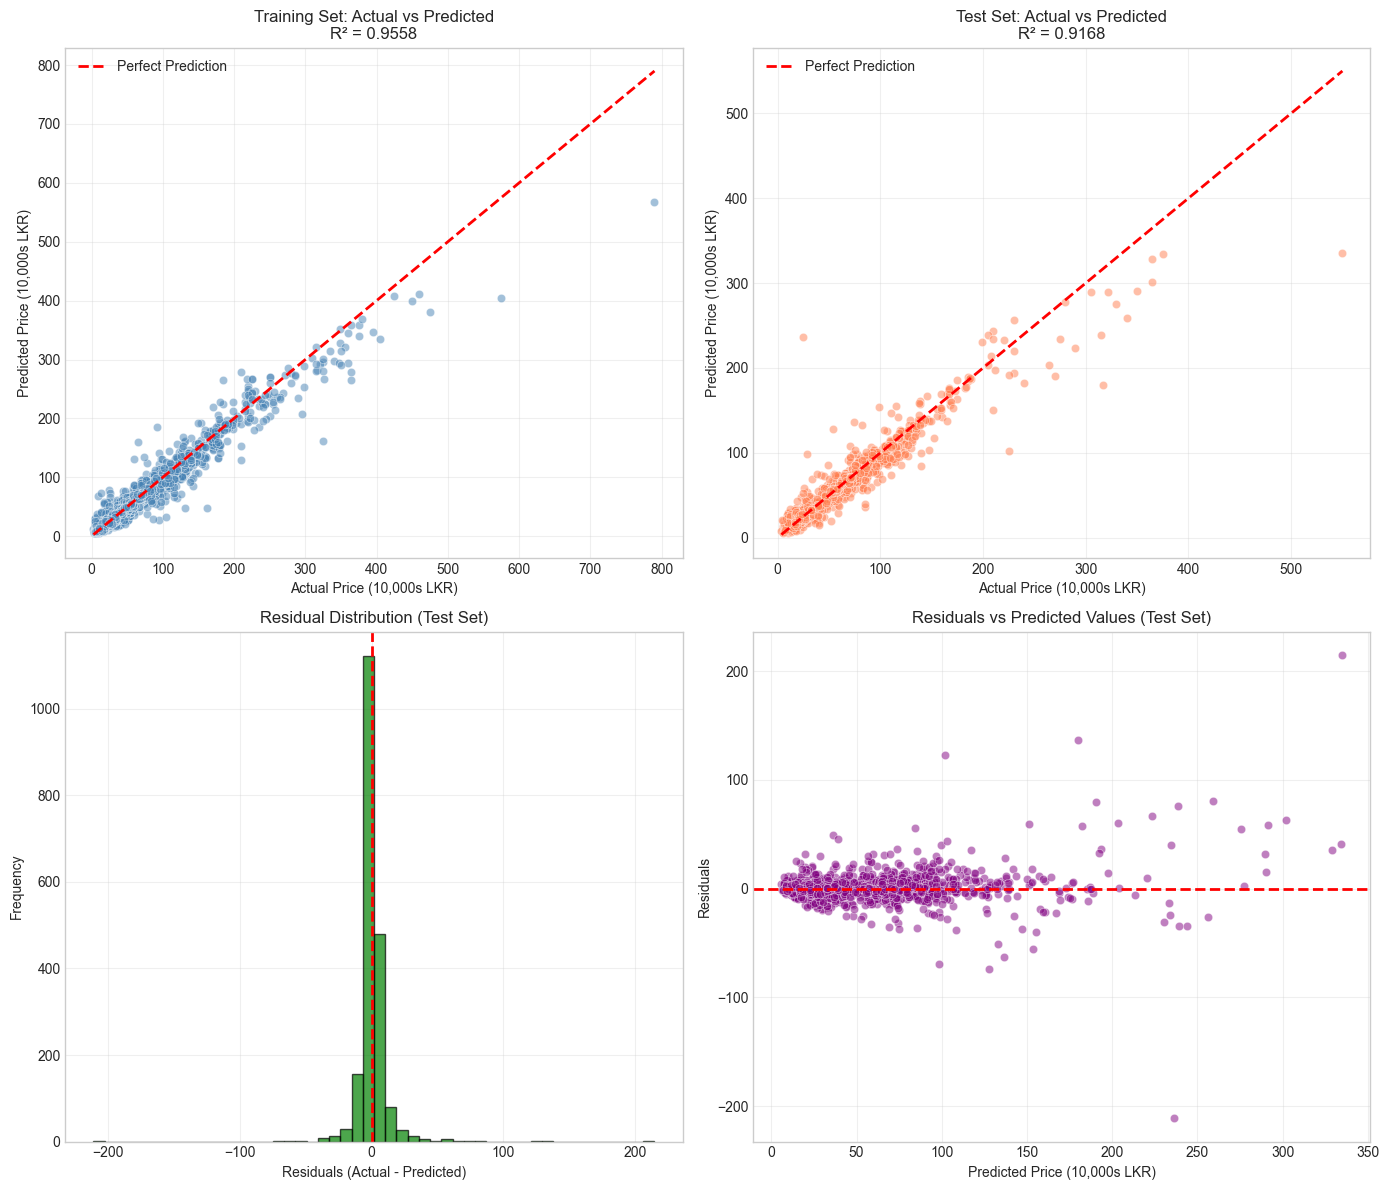

In [39]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, color='steelblue', edgecolors='white', linewidth=0.5)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price (10,000s LKR)')
axes[0, 0].set_ylabel('Predicted Price (10,000s LKR)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R² Score"]:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, color='coral', edgecolors='white', linewidth=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Price (10,000s LKR)')
axes[0, 1].set_ylabel('Predicted Price (10,000s LKR)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_metrics["R² Score"]:.4f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Distribution (Test)
residuals = y_test - y_test_pred
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals (Actual - Predicted)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals vs Predicted
axes[1, 1].scatter(y_test_pred, residuals, alpha=0.5, color='purple', edgecolors='white', linewidth=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price (10,000s LKR)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Predicted Values (Test Set)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis

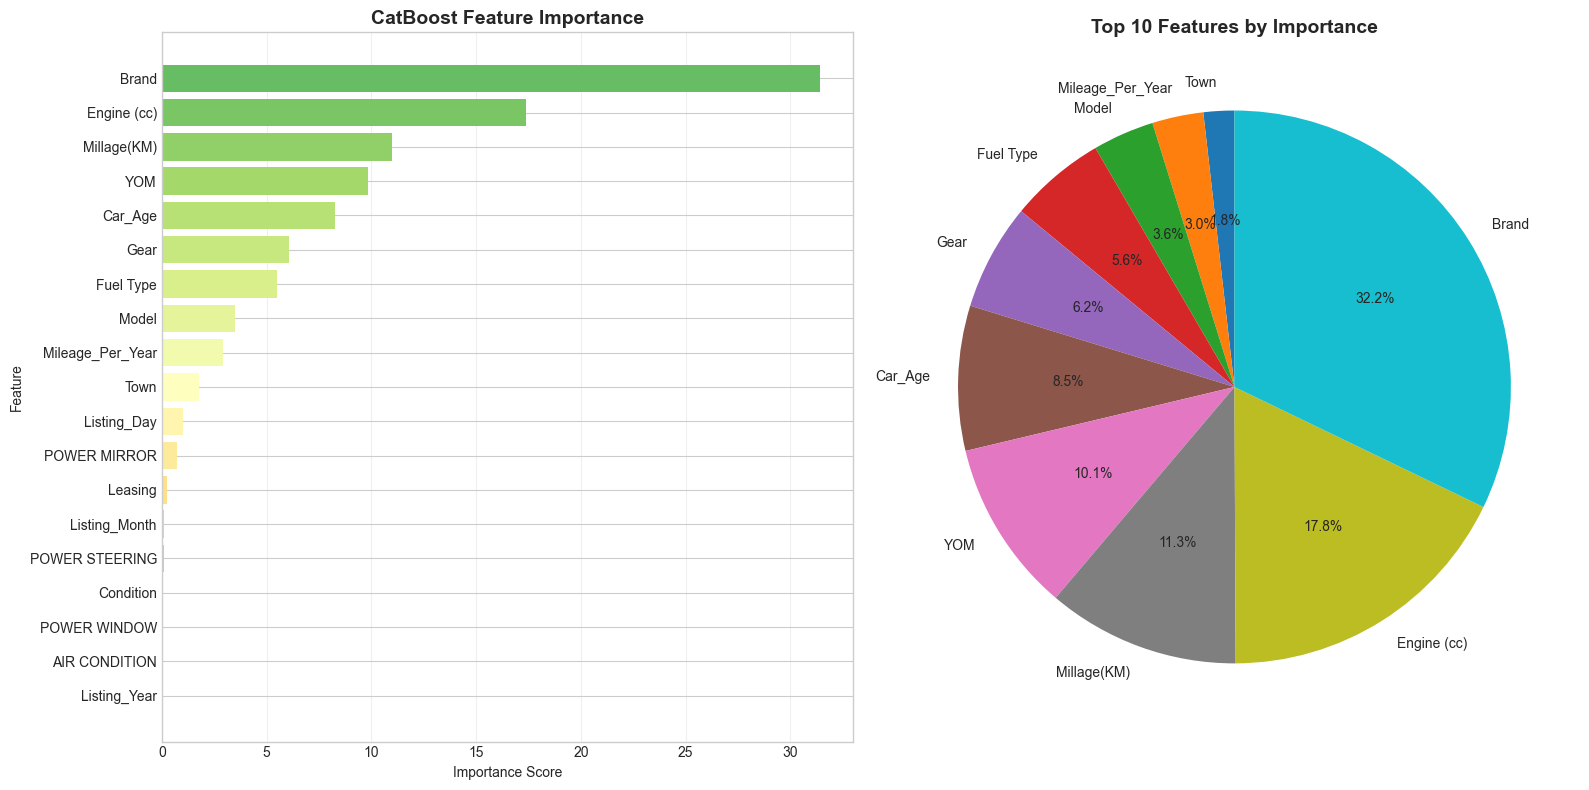


FEATURE IMPORTANCE RANKING

📊 All Features (sorted by importance):

             Feature  Importance
1              Brand       31.41
2        Engine (cc)       17.37
3        Millage(KM)       11.00
4                YOM        9.86
5            Car_Age        8.27
6               Gear        6.08
7          Fuel Type        5.51
8              Model        3.51
9   Mileage_Per_Year        2.93
10              Town        1.76
11       Listing_Day        1.02
12      POWER MIRROR        0.72
13           Leasing        0.27
14     Listing_Month        0.10
15    POWER STEERING        0.09
16         Condition        0.07
17      POWER WINDOW        0.02
18     AIR CONDITION        0.02
19      Listing_Year        0.01


In [40]:
# Get feature importances
feature_importance = model.get_feature_importance()
feature_names = X_train.columns.tolist()

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Horizontal bar chart
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(importance_df)))
axes[0].barh(importance_df['Feature'], importance_df['Importance'], color=colors)
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')
axes[0].set_title('CatBoost Feature Importance', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Top 10 features pie chart
top_10 = importance_df.tail(10)
axes[1].pie(top_10['Importance'], labels=top_10['Feature'], autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.tab10.colors)
axes[1].set_title('Top 10 Features by Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print feature importance table
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE RANKING")
print("=" * 60)
print("\n📊 All Features (sorted by importance):\n")
importance_df_sorted = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_df_sorted.index += 1
importance_df_sorted['Importance'] = importance_df_sorted['Importance'].round(2)
print(importance_df_sorted.to_string())

## 9. Model Persistence

Save the trained model for future use in the API or other applications.

In [41]:
# Save the model
import os

# Create model directory if it doesn't exist
model_dir = '../model'
os.makedirs(model_dir, exist_ok=True)

# Save the CatBoost model
model_path = os.path.join(model_dir, 'car_price_catboost_model.cbm')
model.save_model(model_path)

print("=" * 60)
print("MODEL SAVED SUCCESSFULLY")
print("=" * 60)
print(f"\n✅ Model saved to: {model_path}")
print(f"📊 Model file size: {os.path.getsize(model_path) / 1024:.2f} KB")

# Save feature names and categorical feature indices for inference
import json

model_metadata = {
    'feature_names': feature_names,
    'categorical_features': cat_features,
    'categorical_feature_indices': cat_feature_indices,
    'best_iteration': model.get_best_iteration(),
    'metrics': {
        'train_r2': train_metrics['R² Score'],
        'test_r2': test_metrics['R² Score'],
        'train_rmse': train_metrics['RMSE'],
        'test_rmse': test_metrics['RMSE']
    }
}

metadata_path = os.path.join(model_dir, 'model_metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=4)

print(f"✅ Metadata saved to: {metadata_path}")

MODEL SAVED SUCCESSFULLY

✅ Model saved to: ../model\car_price_catboost_model.cbm
📊 Model file size: 8353.44 KB
✅ Metadata saved to: ../model\model_metadata.json


## 10. Example Prediction

Demonstrating how to use the saved model for predictions.

In [42]:
# Load the saved model and make a sample prediction
from catboost import CatBoostRegressor

# Load model
loaded_model = CatBoostRegressor()
loaded_model.load_model(model_path)

# Sample prediction using a car from the test set
sample_idx = 0
sample_car = X_test.iloc[[sample_idx]]
actual_price = y_test.iloc[sample_idx]
predicted_price = loaded_model.predict(sample_car)[0]

print("=" * 60)
print("SAMPLE PREDICTION DEMONSTRATION")
print("=" * 60)
print("\n📋 Sample Car Features:")
for col, value in sample_car.iloc[0].items():
    print(f"   • {col}: {value}")

print(f"\n💰 Actual Price: {actual_price:.2f} (× 10,000 LKR) = {actual_price * 10000:,.0f} LKR")
print(f"🎯 Predicted Price: {predicted_price:.2f} (× 10,000 LKR) = {predicted_price * 10000:,.0f} LKR")
print(f"📊 Difference: {abs(actual_price - predicted_price):.2f} (× 10,000 LKR) = {abs(actual_price - predicted_price) * 10000:,.0f} LKR")
print(f"📈 Percentage Error: {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")

SAMPLE PREDICTION DEMONSTRATION

📋 Sample Car Features:
   • Brand: NISSAN
   • Model: FB15
   • YOM: 2002
   • Engine (cc): 1500.0
   • Gear: Automatic
   • Fuel Type: Petrol
   • Millage(KM): 253000.0
   • Town: Mawanella
   • Leasing: No Leasing
   • Condition: USED
   • AIR CONDITION: Available
   • POWER STEERING: Available
   • POWER MIRROR: Available
   • POWER WINDOW: Available
   • Listing_Year: 2025
   • Listing_Month: 1
   • Listing_Day: 17
   • Car_Age: 23
   • Mileage_Per_Year: 10541.666666666666

💰 Actual Price: 42.90 (× 10,000 LKR) = 429,000 LKR
🎯 Predicted Price: 42.35 (× 10,000 LKR) = 423,530 LKR
📊 Difference: 0.55 (× 10,000 LKR) = 5,470 LKR
📈 Percentage Error: 1.27%


## Summary

This notebook demonstrated a complete machine learning pipeline for car price prediction using CatBoost:

1. **Data Loading**: Loaded CSV data and removed the ID column
2. **Exploratory Data Analysis**: Analyzed distributions and correlations
3. **Data Preprocessing**: Handled missing values appropriately
4. **Feature Engineering**: Created new features like Car_Age and Mileage_Per_Year
5. **Stratified Splitting**: Used stratified sampling based on Brand and Price categories for representative train/test sets
6. **Model Training**: Trained CatBoost with optimized hyperparameters and early stopping
7. **Evaluation**: Comprehensive metrics including R², RMSE, MAE, and MAPE
8. **Feature Importance**: Analyzed which features most influence price predictions
9. **Model Persistence**: Saved the model for deployment

**Key Advantages of CatBoost:**
- Native handling of categorical features (no encoding needed)
- Robust to overfitting with ordered boosting
- Fast training and prediction
- Built-in cross-validation and early stopping